<a href="https://colab.research.google.com/github/ivandenb/MAT-442-Fall-2024-/blob/main/HW3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.7 Neural Networks**

3.7.1 Mathematical Formulation

An examle of ths simplest nueral network is y =
σ (z) =
σ (w1a1 + w2a2 + b).

Where the b and w are found to help fit as well as possible, through numerical means.

Now in matrix notation the formula becomes z(l) = W^(L)a^(L−1) + b^(L)

3.7.2 Activation functions

We will now plot some example activation functions

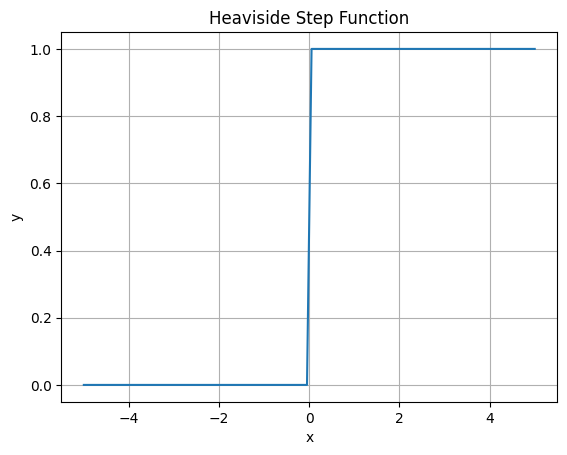

In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt

#define function
def heaviside(x):
  return np.where(x < 0, 0, 1)

#plot function
x = np.linspace(-5, 5, 100)
y = heaviside(x)

plt.plot(x, y)
plt.title('Heaviside Step Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

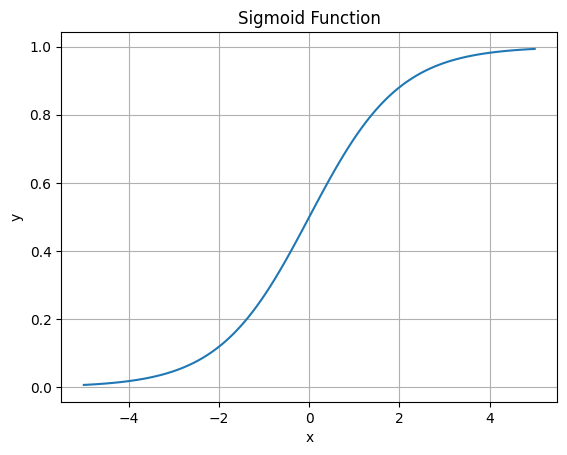

In [3]:
#define sigmoid function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

#plot function
x = np.linspace(-5, 5, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

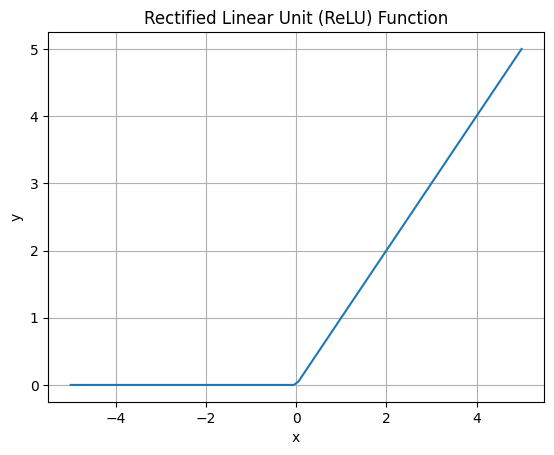

In [5]:
# Define the ReLU
def relu(x):
  return np.maximum(0, x)

# Plot the ReLU function
x = np.linspace(-5, 5, 100)
y = relu(x)

plt.plot(x, y)
plt.title('Rectified Linear Unit (ReLU) Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

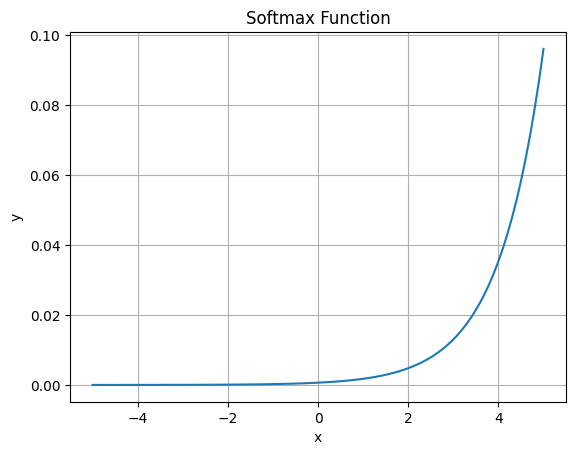

In [6]:
#define a softmax function
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Plot the softmax function
x = np.linspace(-5, 5, 100)
y = softmax(x)

plt.plot(x, y)
plt.title('Softmax Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

These are examples of the activation functions

3.7.3 Cost Function

We will plot an example of the cost function. Mean Sqaure Error function



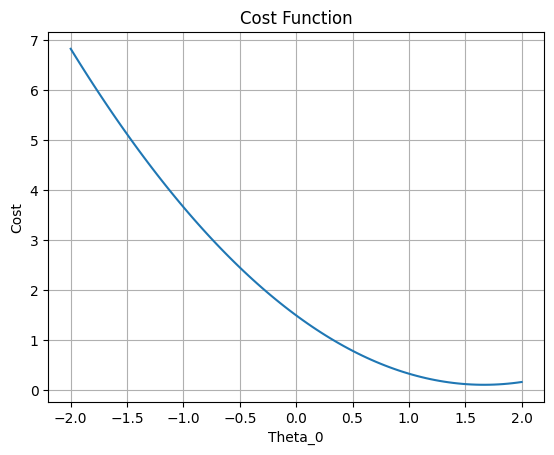

In [9]:
#Mean Squared Error
def cost_function(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

#Sample data
X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([2, 4, 5])
theta = np.array([0, 1])

#set parameters
theta_values = np.linspace(-2, 2, 100)
cost_values = []

for theta_0 in theta_values:
  theta_temp = np.array([theta_0, theta[1]])
  cost_values.append(cost_function(theta_temp, X, y))

#Plot the cost function
plt.plot(theta_values, cost_values)
plt.title('Cost Function')
plt.xlabel('Theta_0')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

Above is a example plot of a cost function

3.7.4 amd 3.7.5 Backpropagation/Backpropagation algorithm

The back propagation allows to improve the cost function from the sigmoid activation function by making the model more reliable and more generalized.

In [16]:
#function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

#dataset
inputs = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])

outputs = np.array([[0, 1, 1, 0]]).T

# Start with mean 0
synaptic_weights = 2 * np.random.random((3, 1)) - 1

# Number of epochs (iterations)
epochs = 100

# Learning rate
learning_rate = 0.1

# Store weights and biases
epoch_weights = []
epoch_biases = []


for epoch in range(epochs):
    input_layer = inputs
    outputs_predicted = sigmoid(np.dot(input_layer, synaptic_weights))

    #Error
    error = outputs - outputs_predicted

    #Backpropagation
    adjustments = error * sigmoid_derivative(outputs_predicted)

    #Fix weights
    synaptic_weights += learning_rate * np.dot(input_layer.T, adjustments)

    #Track weights and biases
    epoch_weights.append(np.copy(synaptic_weights))
    epoch_biases.append(0)

print("Synaptic weights after training:")
print(synaptic_weights)

#for loop to print all of the data
print("\nEpochs, Weights and Biases:")
for i in range(epochs):
    print(f"Epoch {i+1}:")
    print(f"  Weights: \n{epoch_weights[i]}")
    print(f"  Bias: {epoch_biases[i]}")

Synaptic weights after training:
[[ 0.09101662]
 [-0.14798835]
 [-0.00692437]]

Epochs, Weights and Biases:
Epoch 1:
  Weights: 
[[-0.3831405 ]
 [-0.69584789]
 [-0.79757914]]
  Bias: 0
Epoch 2:
  Weights: 
[[-0.37091849]
 [-0.68514687]
 [-0.779776  ]]
  Bias: 0
Epoch 3:
  Weights: 
[[-0.35868002]
 [-0.67439291]
 [-0.76192787]]
  Bias: 0
Epoch 4:
  Weights: 
[[-0.34643691]
 [-0.66359433]
 [-0.74405004]]
  Bias: 0
Epoch 5:
  Weights: 
[[-0.33420156]
 [-0.65276005]
 [-0.72615866]]
  Bias: 0
Epoch 6:
  Weights: 
[[-0.32198689]
 [-0.64189947]
 [-0.70827062]]
  Bias: 0
Epoch 7:
  Weights: 
[[-0.30980628]
 [-0.63102253]
 [-0.69040348]]
  Bias: 0
Epoch 8:
  Weights: 
[[-0.29767352]
 [-0.62013964]
 [-0.67257542]]
  Bias: 0
Epoch 9:
  Weights: 
[[-0.28560272]
 [-0.60926158]
 [-0.65480512]]
  Bias: 0
Epoch 10:
  Weights: 
[[-0.27360819]
 [-0.59839953]
 [-0.63711168]]
  Bias: 0
Epoch 11:
  Weights: 
[[-0.26170442]
 [-0.58756493]
 [-0.61951444]]
  Bias: 0
Epoch 12:
  Weights: 
[[-0.2499059 ]
 [-0.5